In [1]:
# Loading Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv("dataset/IRIS.csv")

In [3]:
data.head(5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# We are using Z score method for checking and removing outliers
# We are just checking one column for better understanding of z-score method
mean = np.mean(data['sepal_width'])
std = np.std(data['sepal_width'])

# Step 1: Calculate the Z-Score
data['width-Z-Score'] = (data['sepal_width'] - mean) / std
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,width-Z-Score
0,5.1,3.5,1.4,0.2,Iris-setosa,1.032057
1,4.9,3.0,1.4,0.2,Iris-setosa,-0.124958
2,4.7,3.2,1.3,0.2,Iris-setosa,0.337848
3,4.6,3.1,1.5,0.2,Iris-setosa,0.106445
4,5.0,3.6,1.4,0.2,Iris-setosa,1.263460


In [5]:
print(f"Here are the outliers based on the z-score threshold, 3:\n {data[data['width-Z-Score'] > 2]}")


Here are the outliers based on the z-score threshold, 3:
     sepal_length  sepal_width  petal_length  petal_width      species  \
14           5.8          4.0           1.2          0.2  Iris-setosa   
15           5.7          4.4           1.5          0.4  Iris-setosa   
32           5.2          4.1           1.5          0.1  Iris-setosa   
33           5.5          4.2           1.4          0.2  Iris-setosa   

    width-Z-Score  
14       2.189072  
15       3.114684  
32       2.420475  
33       2.651878  


In [6]:
# Now we will check all the outliers in these 4 columns
data_1 = data[['sepal_length','sepal_width','petal_length','petal_width']]

# Creating a new dataframe 
data_1 = pd.DataFrame(data_1)

# Calculate mean and standard deviation for all columns
means = data_1.mean()
stds = data_1.std()

# Calculate Z-scores for all columns
z_scores = (data - means) / stds

# Set a threshold for Z-score to identify outliers
threshold = 2  # You can adjust this threshold based on your preference

# Identify rows where any column has an outlier
outliers = (z_scores.abs() > threshold).any(axis=1)

# Display rows with outliers
print("Rows with outliers:")
print(data_1[outliers])
df_no_outliers = data_1[~outliers]
print()
print("Dataframe after removing outliers:")
print(df_no_outliers)

Rows with outliers:
     sepal_length  sepal_width  petal_length  petal_width
14            5.8          4.0           1.2          0.2
15            5.7          4.4           1.5          0.4
32            5.2          4.1           1.5          0.1
33            5.5          4.2           1.4          0.2
60            5.0          2.0           3.5          1.0
105           7.6          3.0           6.6          2.1
117           7.7          3.8           6.7          2.2
118           7.7          2.6           6.9          2.3
122           7.7          2.8           6.7          2.0
131           7.9          3.8           6.4          2.0
135           7.7          3.0           6.1          2.3

Dataframe after removing outliers:
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.

In [7]:
merged_df = pd.merge(df_no_outliers, data, left_index=True, right_index=True)
print(merged_df)

     sepal_length_x  sepal_width_x  petal_length_x  petal_width_x  \
0               5.1            3.5             1.4            0.2   
1               4.9            3.0             1.4            0.2   
2               4.7            3.2             1.3            0.2   
3               4.6            3.1             1.5            0.2   
4               5.0            3.6             1.4            0.2   
..              ...            ...             ...            ...   
145             6.7            3.0             5.2            2.3   
146             6.3            2.5             5.0            1.9   
147             6.5            3.0             5.2            2.0   
148             6.2            3.4             5.4            2.3   
149             5.9            3.0             5.1            1.8   

     sepal_length_y  sepal_width_y  petal_length_y  petal_width_y  \
0               5.1            3.5             1.4            0.2   
1               4.9            3.

In [8]:
# Now we will remove Duplicate Columns 
merged_df = merged_df[['sepal_length_x','sepal_width_x','petal_length_x','petal_width_x','species']]
merged_df.columns = merged_df.columns.str.replace('_x', '')
df = merged_df.copy()
merged_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
unique_summary = df.apply(lambda col: col.unique())
df['species'] = df['species'].astype('category')


In [14]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import make_scorer, precision_score, recall_score

# Load data and define features and labels
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models and hyperparameter ranges
models = {
    'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1, 10]}),
    'KNeighborsClassifier': (KNeighborsClassifier(), {'n_neighbors': range(1, 21)}),
    'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10]}),
    'RandomForestClassifier': (RandomForestClassifier(random_state=42), {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10, 15]}),
}

model_results = {}
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define scoring metrics
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro','f1_macro']

# Perform k-fold cross-validation for each model
for name, (model, params) in models.items():
    print(f"\nEvaluating Model: {name}")
    
    best_mean_cv_accuracy = 0
    best_mean_cv_precision = 0
    best_mean_cv_recall = 0
    best_params = None
    
    # Loop over each hyperparameter combination
    for param_combination in ParameterGrid(params):
        # Set parameters for the current model
        model.set_params(**param_combination)
        
        # Create a pipeline with a StandardScaler and the model
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
        
        # Perform cross-validation for each metric
        cv_scores = {}
        for metric in scoring_metrics:
            cv_scores[metric] = cross_val_score(pipeline, X, y, cv=skf, scoring=metric, n_jobs=-1)
        
        # Print scores for each metric
        for metric, scores in cv_scores.items():
            print(f"Parameters: {param_combination} => {metric.capitalize()}: {scores}")
        
        # Calculate mean scores for each metric
        mean_cv_accuracy = np.mean(cv_scores['accuracy'])
        mean_cv_precision = np.mean(cv_scores['precision_macro'])
        mean_cv_recall = np.mean(cv_scores['recall_macro'])
        mean_cv_f1 = np.mean(cv_scores['f1_macro'])
        
        if mean_cv_accuracy > best_mean_cv_accuracy:
            best_mean_cv_accuracy = mean_cv_accuracy
            best_mean_cv_precision = mean_cv_precision
            best_mean_cv_recall = mean_cv_recall
            best_params = param_combination
    
    # Save results for the model
    model_results[name] = {
        'Best Cross-Validation Accuracy': best_mean_cv_accuracy,
        'Best Cross-Validation Precision': best_mean_cv_precision,
        'Best Cross-Validation Recall': best_mean_cv_recall,
        'Best Parameters': best_params
    }
    
    print(f"Best Cross-Validation Mean Accuracy: {best_mean_cv_accuracy:.2f}")
    print(f"Best Cross-Validation Mean Precision: {best_mean_cv_precision:.2f}")
    print(f"Best Cross-Validation Mean Recall: {best_mean_cv_recall:.2f}")
    print(f"Best Parameters: {best_params}")

# Determine the best model based on cross-validation accuracy
best_model_name = max(model_results, key=lambda model: model_results[model]['Best Cross-Validation Accuracy'])

print(f"\nBest Model: {best_model_name}")
print(f"Metrics: {model_results[best_model_name]}")



Evaluating Model: LogisticRegression
Parameters: {'C': 0.1} => Accuracy: [0.93333333 0.96666667 0.86666667 0.96666667 0.83333333]
Parameters: {'C': 0.1} => Precision_macro: [0.94444444 0.96969697 0.875      0.96969697 0.83501684]
Parameters: {'C': 0.1} => Recall_macro: [0.93333333 0.96666667 0.86666667 0.96666667 0.83333333]
Parameters: {'C': 0.1} => F1_macro: [0.93265993 0.96658312 0.86531987 0.96658312 0.83291562]
Parameters: {'C': 1} => Accuracy: [1.         0.96666667 0.9        1.         0.9       ]
Parameters: {'C': 1} => Precision_macro: [1.         0.96969697 0.9023569  1.         0.9023569 ]
Parameters: {'C': 1} => Recall_macro: [1.         0.96666667 0.9        1.         0.9       ]
Parameters: {'C': 1} => F1_macro: [1.         0.96658312 0.89974937 1.         0.89974937]
Parameters: {'C': 10} => Accuracy: [1.         1.         0.9        1.         0.96666667]
Parameters: {'C': 10} => Precision_macro: [1.         1.         0.9023569  1.         0.96969697]
Parameters: {

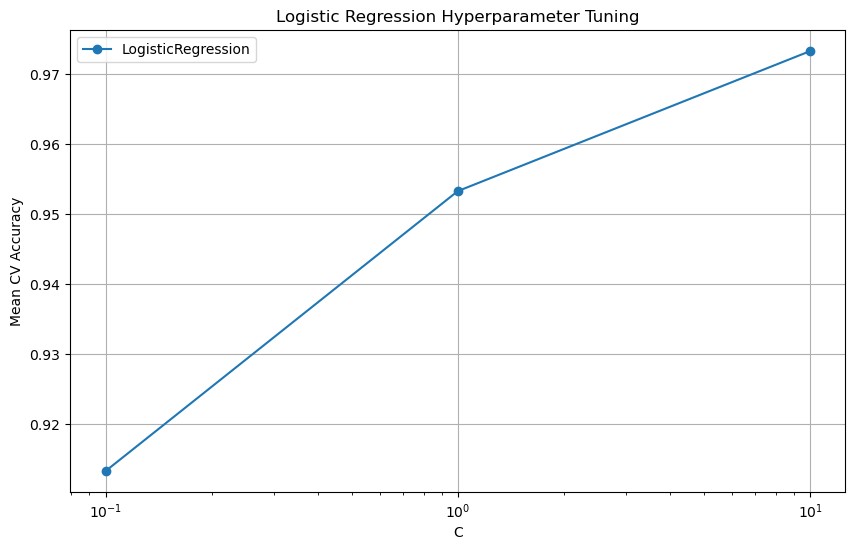

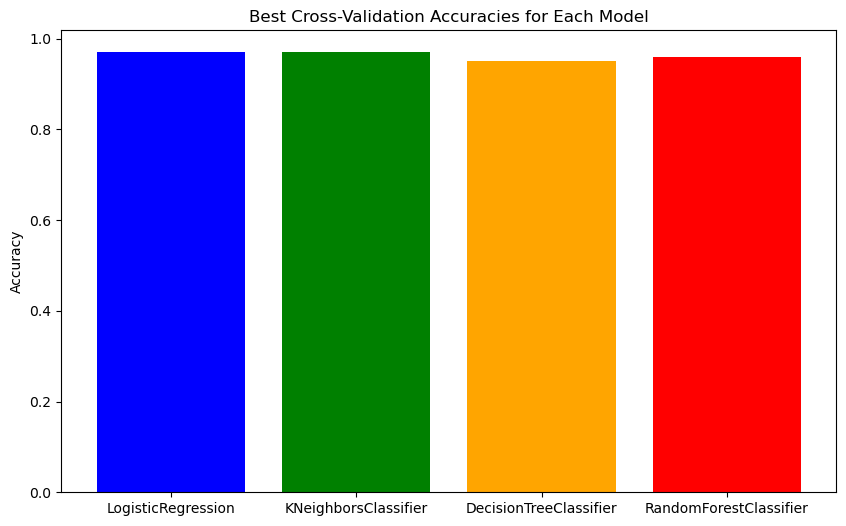

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation for visualization
results = {
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'CV Accuracy': [
            [0.93333333, 0.96666667, 0.86666667, 0.96666667, 0.83333333],
            [1.0, 0.96666667, 0.9, 1.0, 0.9],
            [1.0, 1.0, 0.9, 1.0, 0.96666667]
        ]
    },
    'KNeighborsClassifier': {
        'n_neighbors': range(1, 21),
        'CV Accuracy': [
            [1.0, 0.93333333, 0.86666667, 1.0, 0.86666667],
            [1.0, 0.93333333, 0.86666667, 1.0, 0.9],
            # Add remaining data here...
        ]
    },
    'DecisionTreeClassifier': {
        'max_depth': [None, 5, 10],
        'CV Accuracy': [
            [1.0, 0.96666667, 0.93333333, 0.96666667, 0.9],
            [0.96666667, 0.96666667, 0.93333333, 0.96666667, 0.9],
            [1.0, 0.96666667, 0.93333333, 0.96666667, 0.9]
        ]
    },
    'RandomForestClassifier': {
        'parameters': ['max_depth', 'n_estimators'],
        'values': [
            {'max_depth': None, 'n_estimators': 10},
            {'max_depth': None, 'n_estimators': 50},
            # Add remaining data here...
        ],
        'CV Accuracy': [
            [1.0, 0.96666667, 0.93333333, 0.96666667, 0.93333333],
            [0.96666667, 0.96666667, 0.93333333, 1.0, 0.9],
            # Add remaining data here...
        ]
    }
}

# Example Plot: LogisticRegression
lr_C = results['LogisticRegression']['C']
lr_accuracies = np.mean(results['LogisticRegression']['CV Accuracy'], axis=1)

plt.figure(figsize=(10, 6))
plt.plot(lr_C, lr_accuracies, marker='o', label='LogisticRegression')
plt.title('Logistic Regression Hyperparameter Tuning')
plt.xlabel('C')
plt.ylabel('Mean CV Accuracy')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()

# Example Plot: Compare Best Accuracies
models = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier']
best_accuracies = [0.97, 0.97, 0.95, 0.96]  # Add from your data

plt.figure(figsize=(10, 6))
plt.bar(models, best_accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Best Cross-Validation Accuracies for Each Model')
plt.ylabel('Accuracy')
plt.show()
